In [21]:
%matplotlib inline 
# for ipython to display plots in the notebook

import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import statsmodels.api as sm

import matplotlib.pyplot as plt
from matplotlib import rcParams


import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")


# Linear Regression

Applying Linear Regression on [Boston Housing data](https://archive.ics.uci.edu/ml/datasets/Housing) set contains information about the housing values in suburbs of Boston. This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository.

This data set is available in the 
[sklearn](http://scikitlearn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.dataset)

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()

In [7]:
type(boston)

sklearn.datasets.base.Bunch

In [8]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [9]:
boston.data.shape
boston.DESCR
boston.target
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

In [10]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [12]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


The training dataset of prices is stored in boston.target. Lets add this to the bos dataframe as PRICE variable.

In [13]:
bos['PRICE'] = boston.target

In [14]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Exploration and Summary on the dataset...

In [18]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


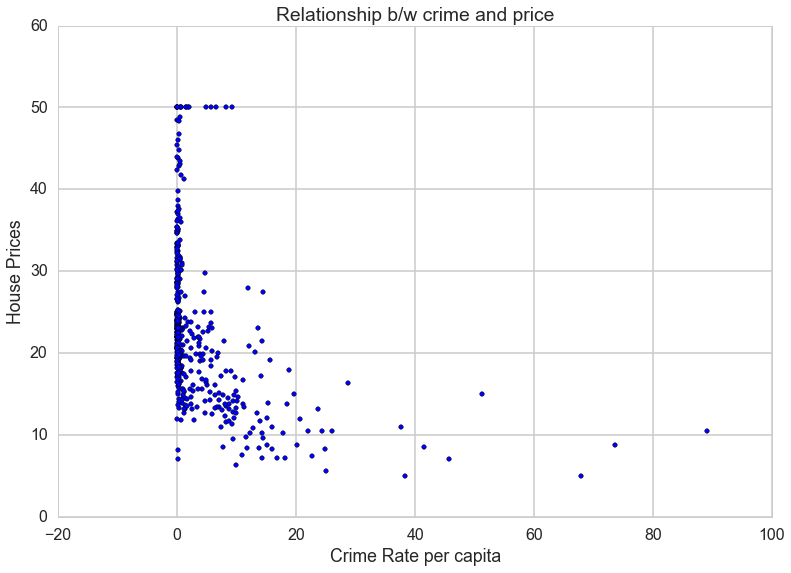

In [27]:
## Drawing some scatterplots
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Crime Rate per capita")
plt.ylabel("House Prices")
plt.title("Relationship b/w crime and price")

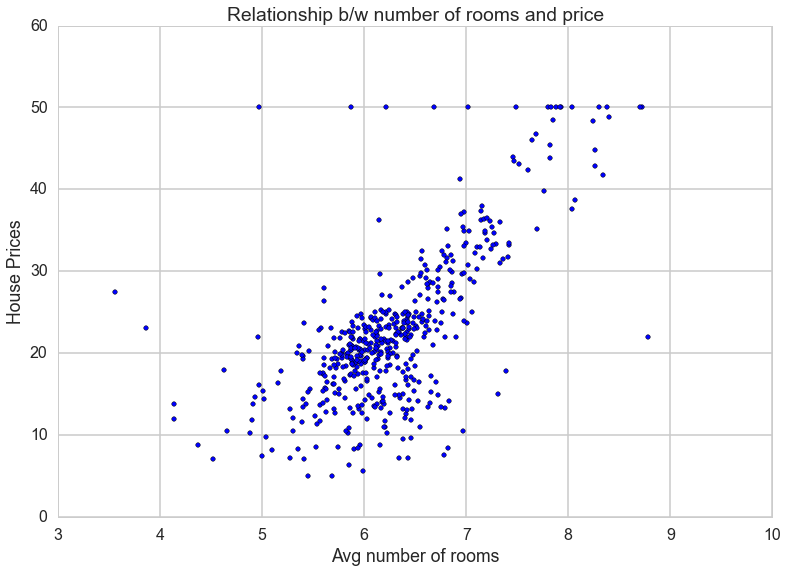

In [26]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Avg number of rooms")
plt.ylabel("House Prices")
plt.title("Relationship b/w number of rooms and price")

Here we can see some linear relationsip which is obvious since the number of rooms are usually higher for expensive houses.

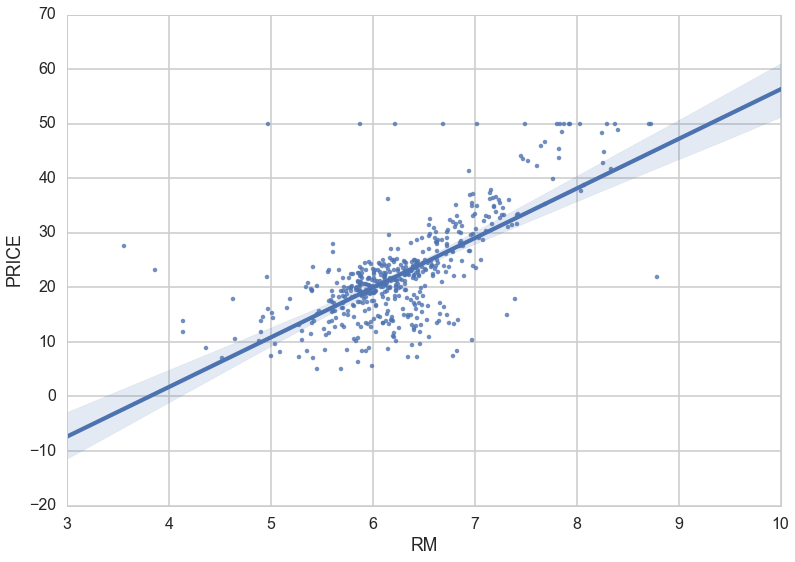

In [29]:
# An awesome seaborn plot to achieve automatic linear regression fits
sns.regplot(y="PRICE",x="RM", data=bos, fit_reg=True)

<function matplotlib.pyplot.show>

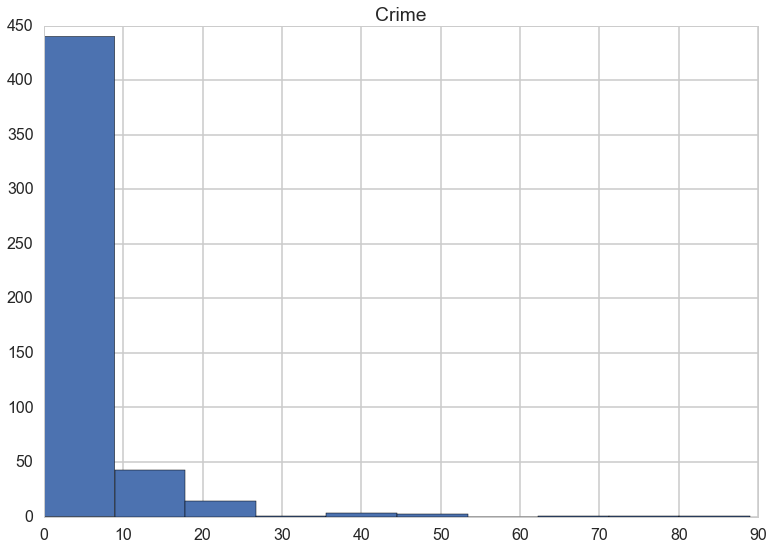

In [38]:
# Making some histograms!!
plt.hist(bos.CRIM)
plt.title("Crime")
plt.show

<function matplotlib.pyplot.show>

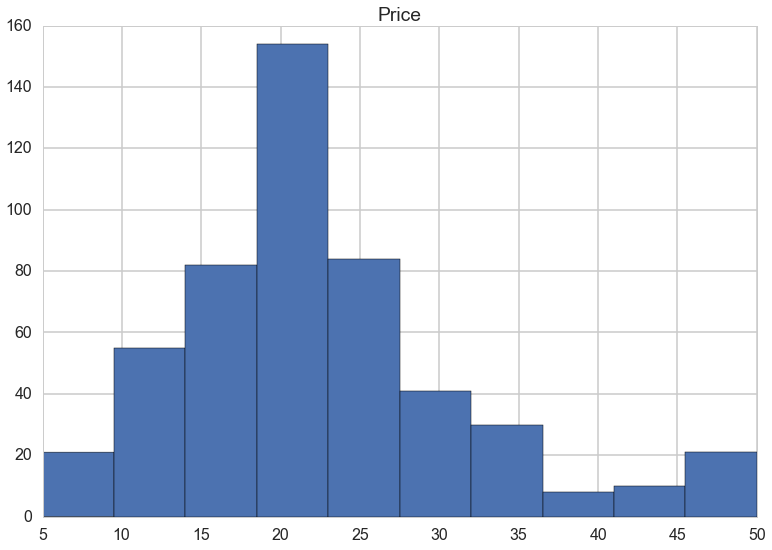

In [40]:
plt.hist(bos.PRICE)
plt.title("Price")
plt.show

### Using Statsmodel package

In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols # ordinary least square method

In [48]:
m = ols('PRICE ~ RM', bos).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 12 Feb 2016   Prob (F-statistic):           2.49e-74
Time:                        18:28:01   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000       -39.877   -29.465
RM             9.1021      0.419     21.722      0.000         8.279     9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================
"""

In [49]:
m1 = ols('PRICE ~ CRIM', bos).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     88.15
Date:                Fri, 12 Feb 2016   Prob (F-statistic):           2.08e-19
Time:                        18:28:07   Log-Likelihood:                -1799.5
No. Observations:                 506   AIC:                             3603.
Df Residuals:                     504   BIC:                             3611.
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     24.0162      0.409     58.676      0.000        23.212    24.820
CRIM          -0.4128      0.044     -9.389      0.000        -0.499    -0.326
==============================================================================
Omnibus:                      138.965   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.343
Skew:                           1.483   Prob(JB):                     3.30e-64
Kurtosis:                       5.251   Cond. No.                         10.1
==============================================================================
"""

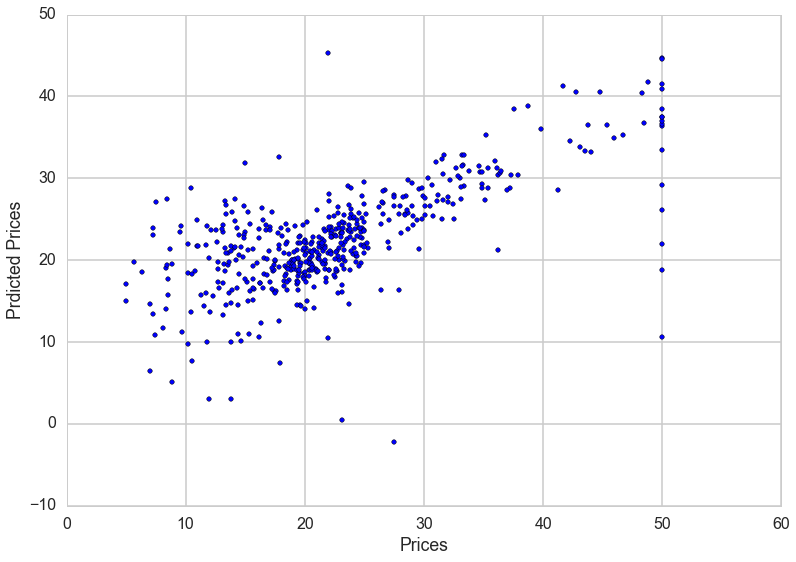

In [77]:
plt.scatter(bos['PRICE'], m.fittedvalues)
plt.xlabel('Prices')
plt.ylabel('Prdicted Prices')

### Using sklearn package

In [70]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE',axis = 1)

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [71]:
lm.fit(X, bos.PRICE) # X is the data and PRICE is the output

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [80]:
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

<function matplotlib.pyplot.show>

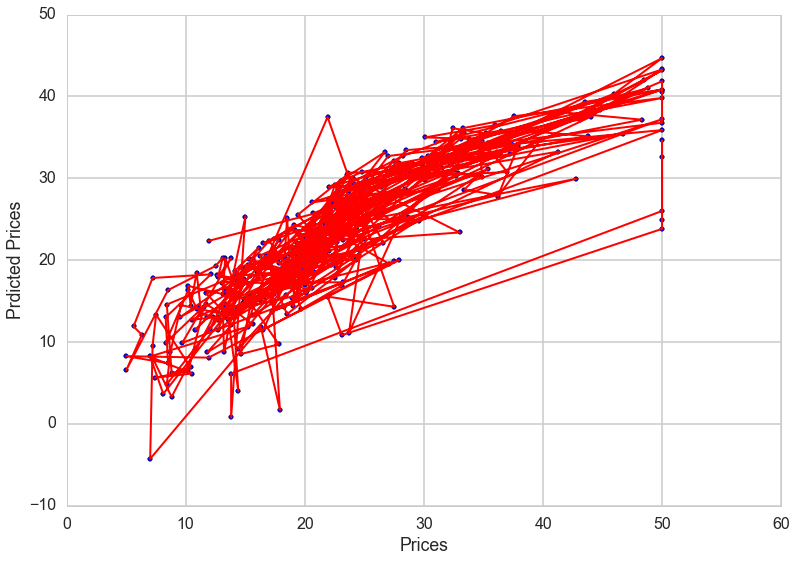

In [109]:
plt.scatter(bos['PRICE'],lm.predict(X))
plt.xlabel('Prices')
plt.ylabel('Prdicted Prices')

plt.plot(bos.PRICE, lm.predict(X), color = 'red', linewidth = 2)
plt.show

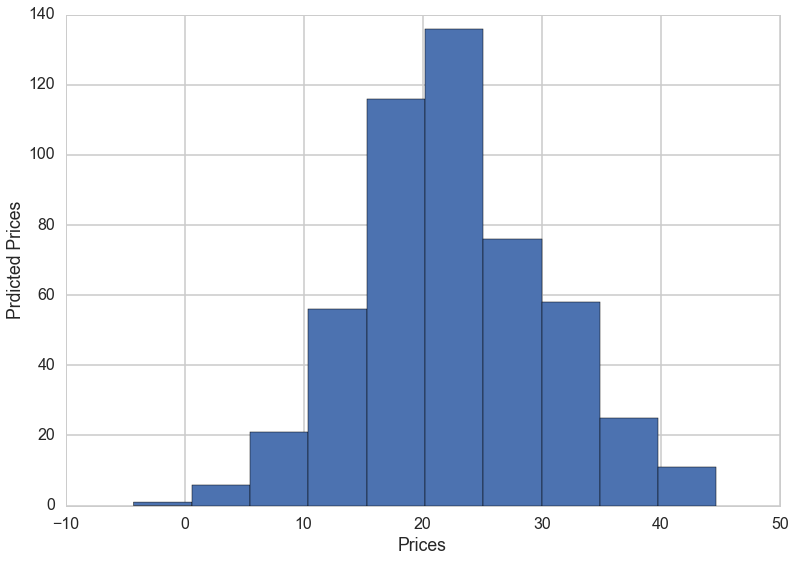

In [84]:
plt.hist(lm.predict(X))
plt.xlabel('Prices')
plt.ylabel('Prdicted Prices')

We can easily say that sklearn has done a better job at predicting the prices in this case, since the graph looks significantly linear in this case as compared to statsmodel.

In [87]:
print np.sum((bos.PRICE - lm.predict(X))**2) # Residual sum of squares

11080.2762841


In [89]:
mseFull = np.mean((bos.PRICE - lm.predict(X))**2) ## Mean squared error
mseFull

21.897779217687496

In [90]:
lm2 = LinearRegression()

In [97]:
lm2.fit(X[['PTRATIO']], bos.PRICE )

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [100]:
msePTRATIO = np.mean((bos.PRICE - lm2.predict(X[['PTRATIO']]))**2)
print msePTRATIO

62.6522000138


<function matplotlib.pyplot.show>

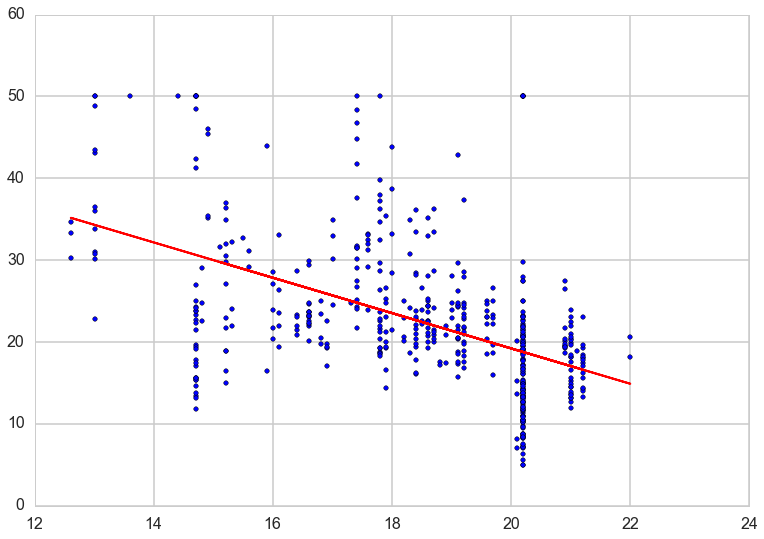

In [120]:
plt.scatter(bos.PTRATIO, bos.PRICE)

plt.plot(bos.PTRATIO, lm2.predict(X[['PTRATIO']]), color = 'red', linewidth = 2)
plt.show

## Multiple linear regression

***

Fitting a linear regression model using three independent variables

1. 'CRIM' (per capita crime rate by town)
2. 'RM' (average number of rooms per dwelling)
3. 'PTRATIO' (pupil-teacher ratio by town)

Calculate the mean squared error. 

In [116]:
lm3 = LinearRegression()

In [126]:
lm3.fit(X[['RM']+['CRIM']+['PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [129]:
lm3.predict(X[['RM']+['CRIM']+['PTRATIO']])[0:5]

array([ 28.7908486 ,  24.96437805,  30.60389905,  28.25575124,  29.34819129])

In [131]:
msecombined = np.mean((bos.PRICE - lm3.predict(X[['RM']+['CRIM']+['PTRATIO']]))**2)
print msecombined

34.3237965647


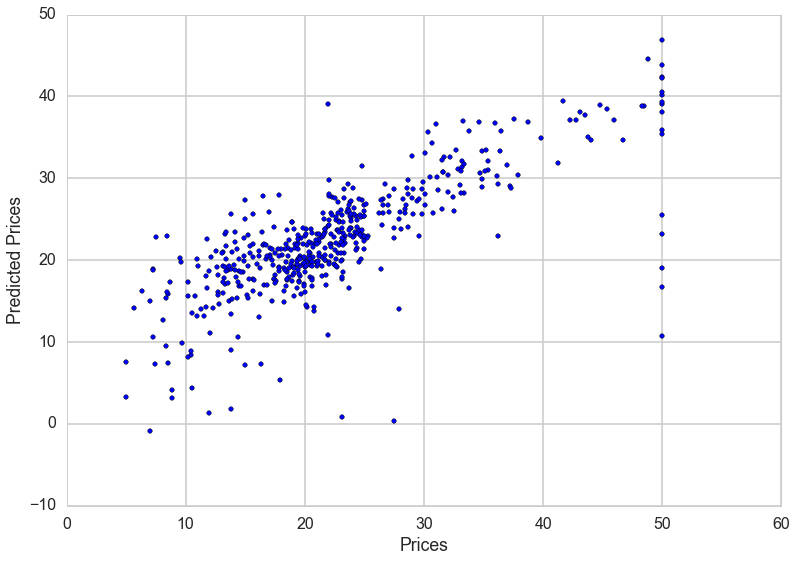

In [138]:
plt.scatter(bos['PRICE'],lm3.predict(X[['RM']+['CRIM']+['PTRATIO']]))
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')

#plt.plot(bos.RM, lm3.predict(X[['RM']+['CRIM']+['PTRATIO']]), color = 'red', linewidth =3)

In [143]:
X_train = X[:-50]
X_test = X[-50:]
Y_train = bos.PRICE[:-50]
Y_test = bos.PRICE[-50:]
print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape


(456, 13)
(50, 13)
(456,)
(50,)


In [156]:
X_train, X_test, Y_train, Y_test= sklearn.cross_validation.train_test_split(
X, bos.PRICE, test_size=0.33, random_state = 5)
print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(339, 13)
(167, 13)
(339,)
(167,)


In [159]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [164]:
meanSE = np.mean((Y_train- pred_train)**2)
meanSE2 = np.mean((Y_test- pred_test)**2)
meanSE, meanSE2


(19, 28.541367275618427)

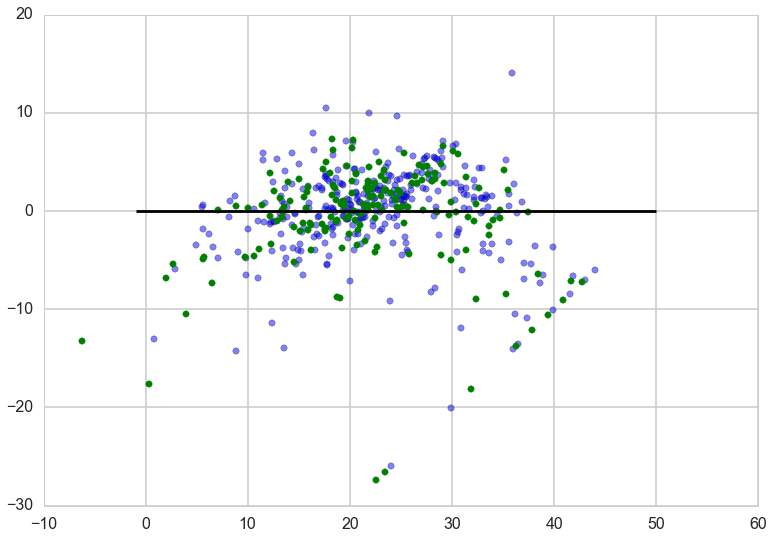

In [176]:
plt.scatter(pred_train, (pred_train - Y_train), c='b', s= 40, alpha = 0.5)
plt.scatter(pred_test, (pred_test - Y_test), color='g', s= 40, alpha =1)
plt.hlines(y= 0, xmin = -1, xmax = 50)

## K-fold Cross Validation

In [194]:
faithful = sm.datasets.get_rdataset("faithful")
type(faithful)

statsmodels.datasets.utils.Dataset

In [198]:
faithful = faithful.data

In [200]:
faithful.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [202]:
faithful.shape

(272, 2)

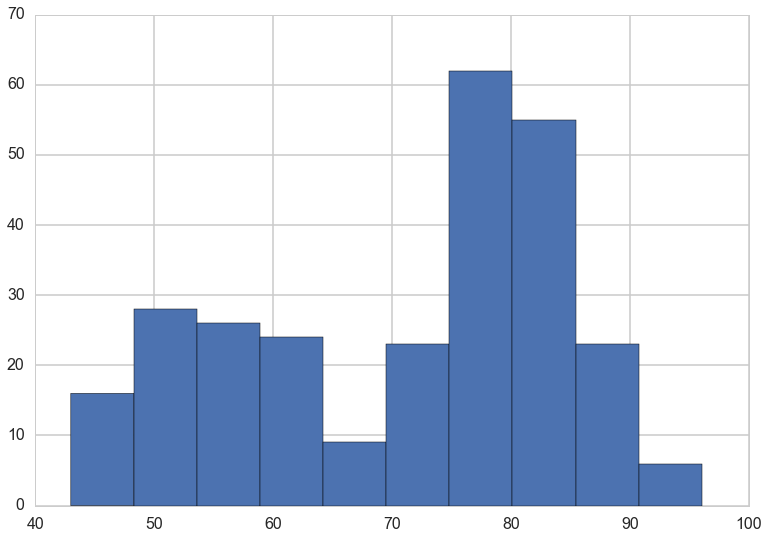

In [205]:
plt.hist(faithful.waiting)
plt.show()

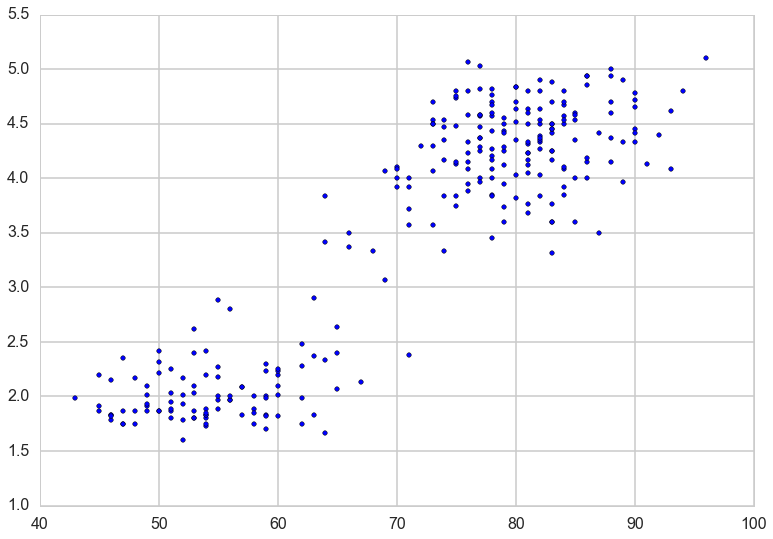

In [206]:
plt.scatter(faithful.waiting, faithful.eruptions)

## LOGISTIC REGRESSION

### Data from challenger aircraft O-ring failure.

In [208]:
data = np.array([[float(j) for j in e.strip().split()] for e in open("./data/chall.txt")])
data

array([[ 66.,   0.],
       [ 70.,   1.],
       [ 69.,   0.],
       [ 68.,   0.],
       [ 67.,   0.],
       [ 72.,   0.],
       [ 73.,   0.],
       [ 70.,   0.],
       [ 57.,   1.],
       [ 63.,   1.],
       [ 70.,   1.],
       [ 78.,   0.],
       [ 67.,   0.],
       [ 53.,   1.],
       [ 67.,   0.],
       [ 75.,   0.],
       [ 70.,   0.],
       [ 81.,   0.],
       [ 76.,   0.],
       [ 79.,   0.],
       [ 75.,   1.],
       [ 76.,   0.],
       [ 58.,   1.]])

In [211]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols

dat = pd.DataFrame(data, columns=["Temperature", "Failure"])
logit_model = logit('Failure ~ Temperature', dat).fit()
print logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Failure   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Fri, 12 Feb 2016   Pseudo R-squ.:                  0.2813
Time:                        22:45:05   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
                                        LLR p-value:                  0.004804
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      15.0429      7.379      2.039      0.041         0.581    29.505
Temperature    -0.2322    

In [217]:
x = np.linspace(50,85,1000)
p =  logit_model.params
eta = p['Intercept'] + x*p['Temperature']
y = np.exp(eta)/(1 + np.exp(eta))
type(y)

numpy.ndarray

(-0.1, 1.1)

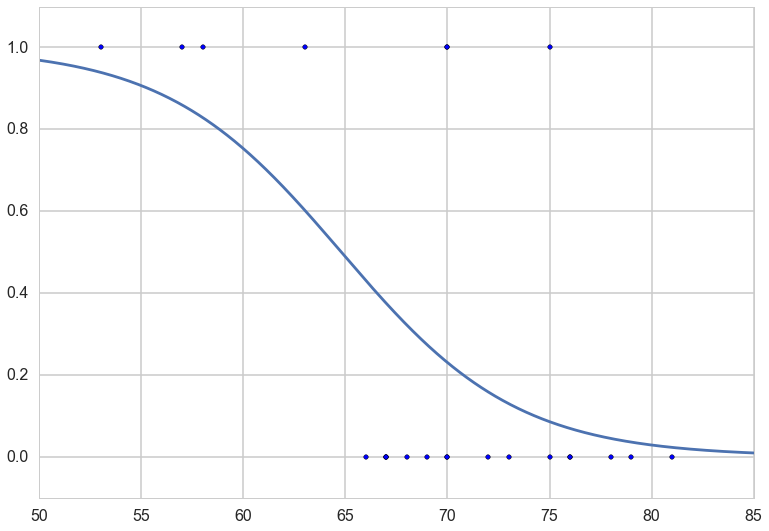

In [221]:
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
plt.plot(x, y)

plt.xlim(50, 85)
plt.ylim(-0.1, 1.1)